In [8]:
from modules.utils_data import load_data
from modules.plotting import plot_scatter_and_line
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import numpy as np

from rdkit import Chem


In [9]:
%%capture
# The previous line silences the output because I don't like it

# Load the data
df_combined = load_data()

In [10]:
#drop everything that has a NaN for column LogP
df_combined = df_combined.dropna(subset=['LogP'])
#keep only columns smiles and logP
df_logp = df_combined[['SMILES', 'LogP']]
df_logp

,SMILES,LogP
1,BrC(Br)(Br)Br,3.420
4,BrC(Br)Br,2.535
9,BrC1C2CC3C(C2)C13,3.110
10,BrC1CC2CCC1C2,3.540
13,BrC1CCCCC1,3.200
...,...,...
23223,c1ncc2nc[nH]c2n1,-0.370
23224,c1ncncn1,0.120
23225,c1nnn(C23CC4CC(CC(C4)C2)C3)n1,2.950
23226,c1nnn[nH]1,-0.600


In [26]:
from rdkit.Chem import Descriptors

def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:        
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
        
    return res

In [27]:
smiles = df_logp['SMILES']
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
allDescrs = [getMolDescriptors(m) for m in mols]

Traceback (most recent call last):
  File "/tmp/ipykernel_3763259/2576770666.py", line 17, in getMolDescriptors
    val = fn(mol)
          ^^^^^^^
  File "/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/rdkit/Chem/QED.py", line 203, in qed
    qedProperties = properties(mol)
                    ^^^^^^^^^^^^^^^
  File "/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/rdkit/Chem/QED.py", line 168, in properties
    ALOGP=Crippen.MolLogP(mol),
          ^^^^^^^^^^^^^^^^^^^^
  File "/localhome/cschiebroek/.conda/envs/chemprop/lib/python3.11/site-packages/rdkit/Chem/Crippen.py", line 171, in <lambda>
    MolLogP = lambda *x, **y: rdMolDescriptors.CalcCrippenDescriptors(*x, **y)[0]
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
Traceback (most recent call last):
  File "/tmp/ipykernel_3763259/2576770666.py", line 17, in getMolDescriptors
    val = fn(mol)
          ^^^^^^^
  File "/localhome/c

In [28]:
# df = pd.DataFrame(allDescrs)
df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,3.125000,3.125000,0.250000,-0.250000,0.598169,12.000000,331.627,331.627,327.673348,32,...,0,0,0,0,0,0,0,0,0,0
1,3.104167,3.104167,0.270833,0.270833,0.581278,9.000000,252.731,251.723,249.762836,26,...,0,0,0,0,0,0,0,0,0,0
2,3.752315,3.752315,0.942130,0.942130,0.491423,73.875000,173.053,163.981,171.988762,44,...,0,0,0,0,0,0,0,0,0,0
3,3.695255,3.695255,0.890046,0.890046,0.496072,52.875000,175.069,163.981,174.004412,46,...,0,0,0,0,0,0,0,0,0,0
4,3.588194,3.588194,0.848380,0.848380,0.481348,25.285714,163.058,151.970,162.004412,42,...,0,0,0,0,0,0,0,0,0,0


In [31]:
for c in df.columns:
    print(c)
#drop columns that have NaN values
df = df.dropna(axis=1)
print(df.shape)

MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
SPS
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EState_VSA7
EState_VSA8
EState_VSA9
VSA_EState1
VSA_EState10
VSA_EState2
VSA_EState3
VSA_EState4
VSA_EState5
VSA_EState6
VSA_EState7
VSA_EState8
VSA_EState9
FractionCSP3
HeavyAtomCount
N

In [16]:
from rdkit.Chem import Draw,rdMolDescriptors,AllChem
fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m,2) for m in mols]

In [18]:


import numpy as np
from __future__ import print_function

from rdkit import Chem
from rdkit.Chem import Draw,rdMolDescriptors,AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import SimDivFilters,DataStructs

import gzip
%pylab inline

from rdkit import rdBase
print(rdBase.rdkitVersion)
import time
print(time.asctime())


def dmat_sim(fps,ntopick):
    ds=[]
    for i in range(1,len(fps)):
         ds.extend(DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i],returnDistance=True))
    mmp =SimDivFilters.MaxMinPicker()
    ids=mmp.Pick(np.array(ds),len(fps),ntopick)
    return ids

dmat_ids=dmat_sim(fps,100)



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
2023.09.6
Wed Jun  5 13:48:31 2024


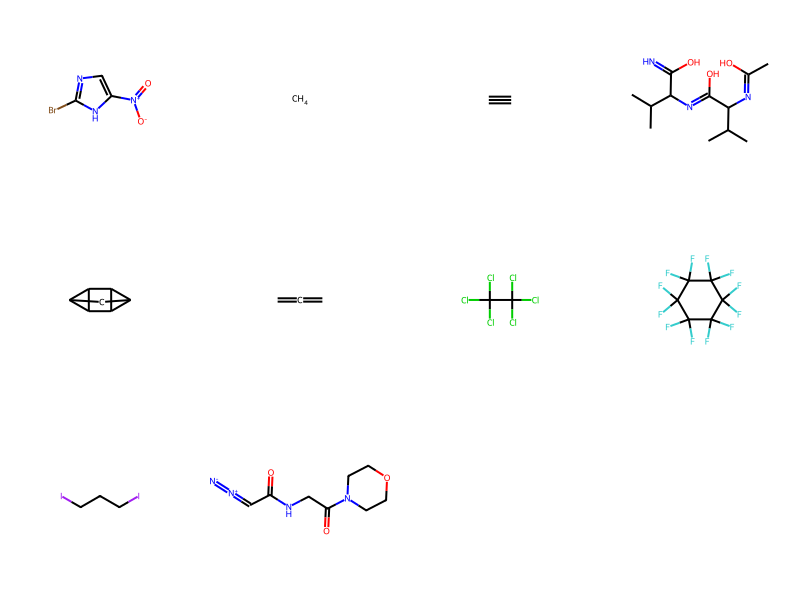

In [20]:
Draw.MolsToGridImage([mols[x] for x in dmat_ids[:10]],molsPerRow=4)

In [44]:


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 500, 10)
X = df.values
#first normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in tqdm(K):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


100%|██████████| 50/50 [02:12<00:00,  2.66s/it]


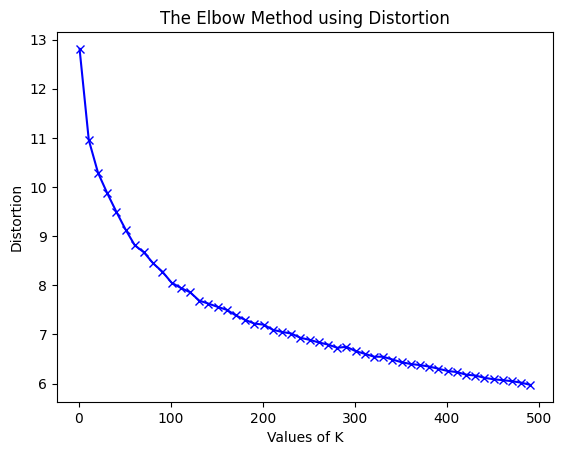

In [45]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


In [58]:
kmeans = KMeans(n_clusters=120, random_state=42)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_


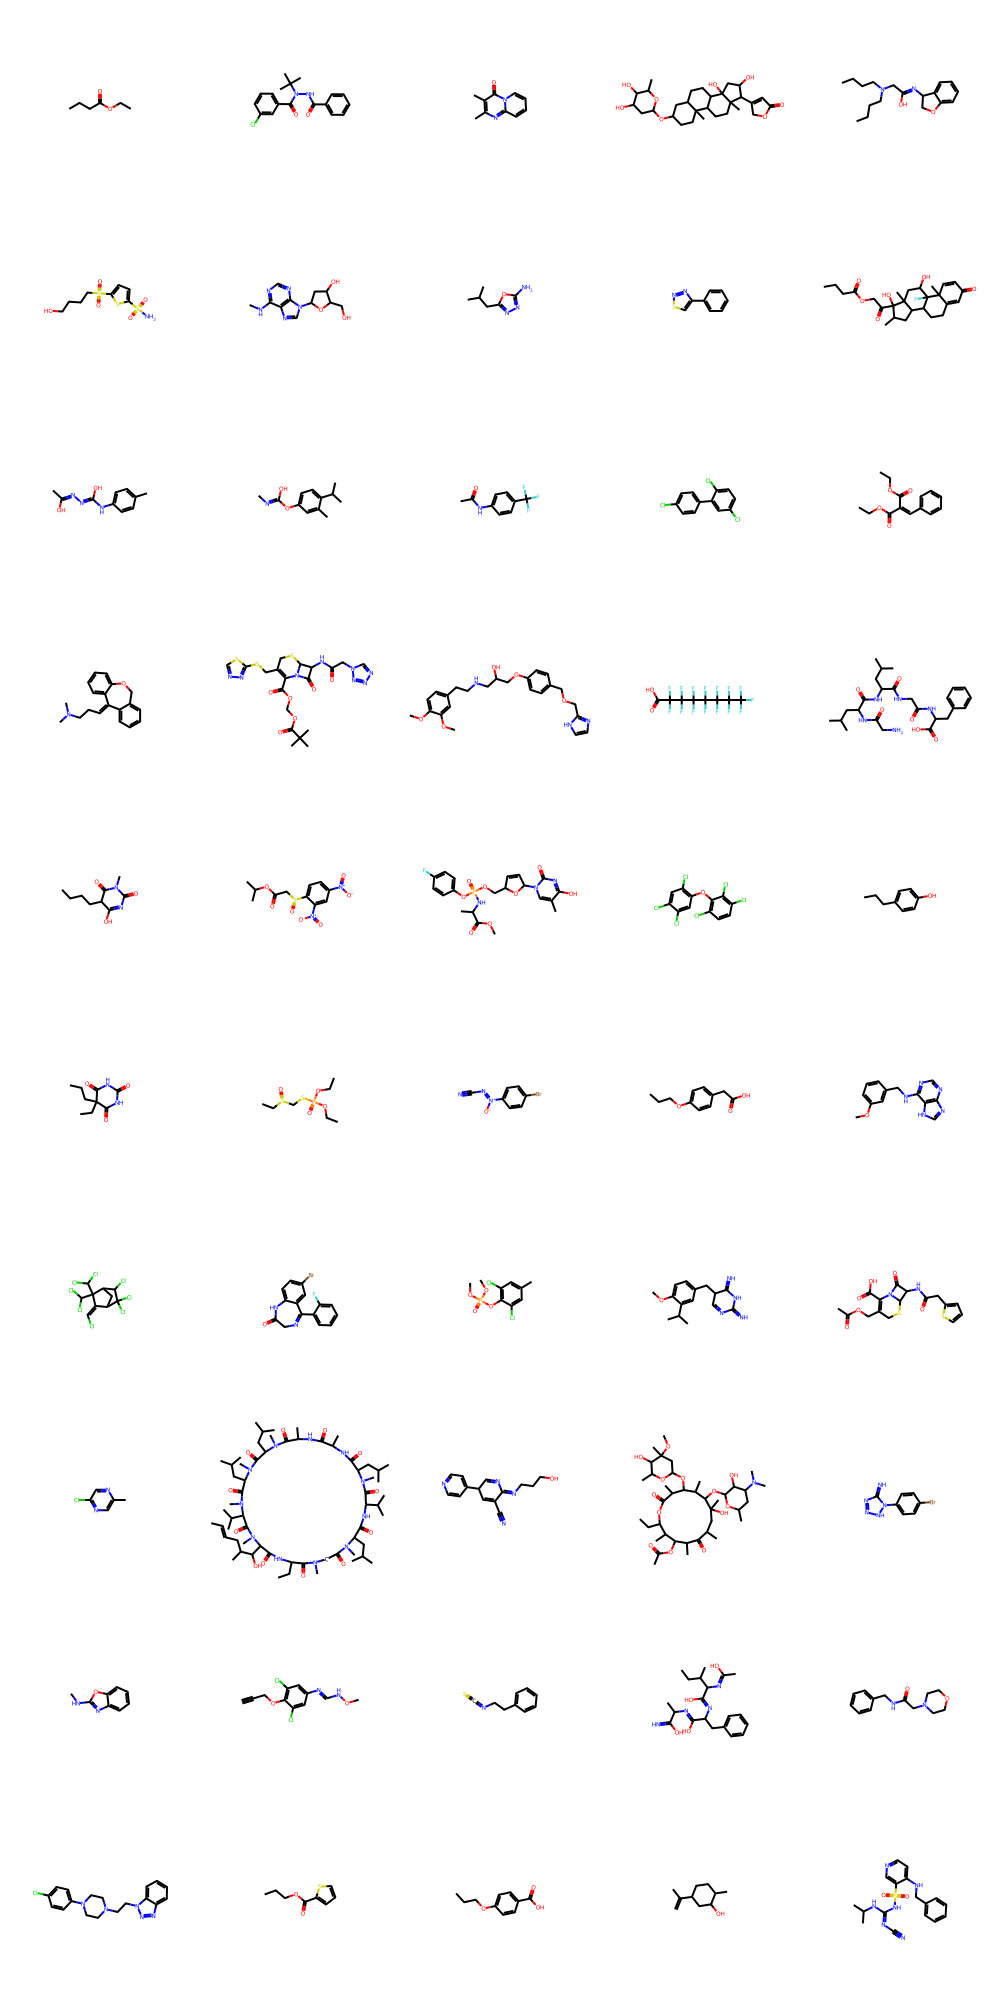

In [63]:
def find_closest_molecule(data, centroids, cluster_labels):
    closest_indices = []
    for i, centroid in enumerate(centroids):
        cluster_data = data[cluster_labels == i]
        distances = ((cluster_data - centroid) ** 2).sum(axis=1)
        closest_idx = distances.idxmin()
        closest_indices.append(closest_idx)
    return closest_indices

closest_molecule_indices = find_closest_molecule(pd.DataFrame(X), centroids, clusters)
mols_centroids = [mols[i] for i in closest_molecule_indices]
#draw first 50
Draw.MolsToGridImage(mols_centroids[:50],molsPerRow=5)

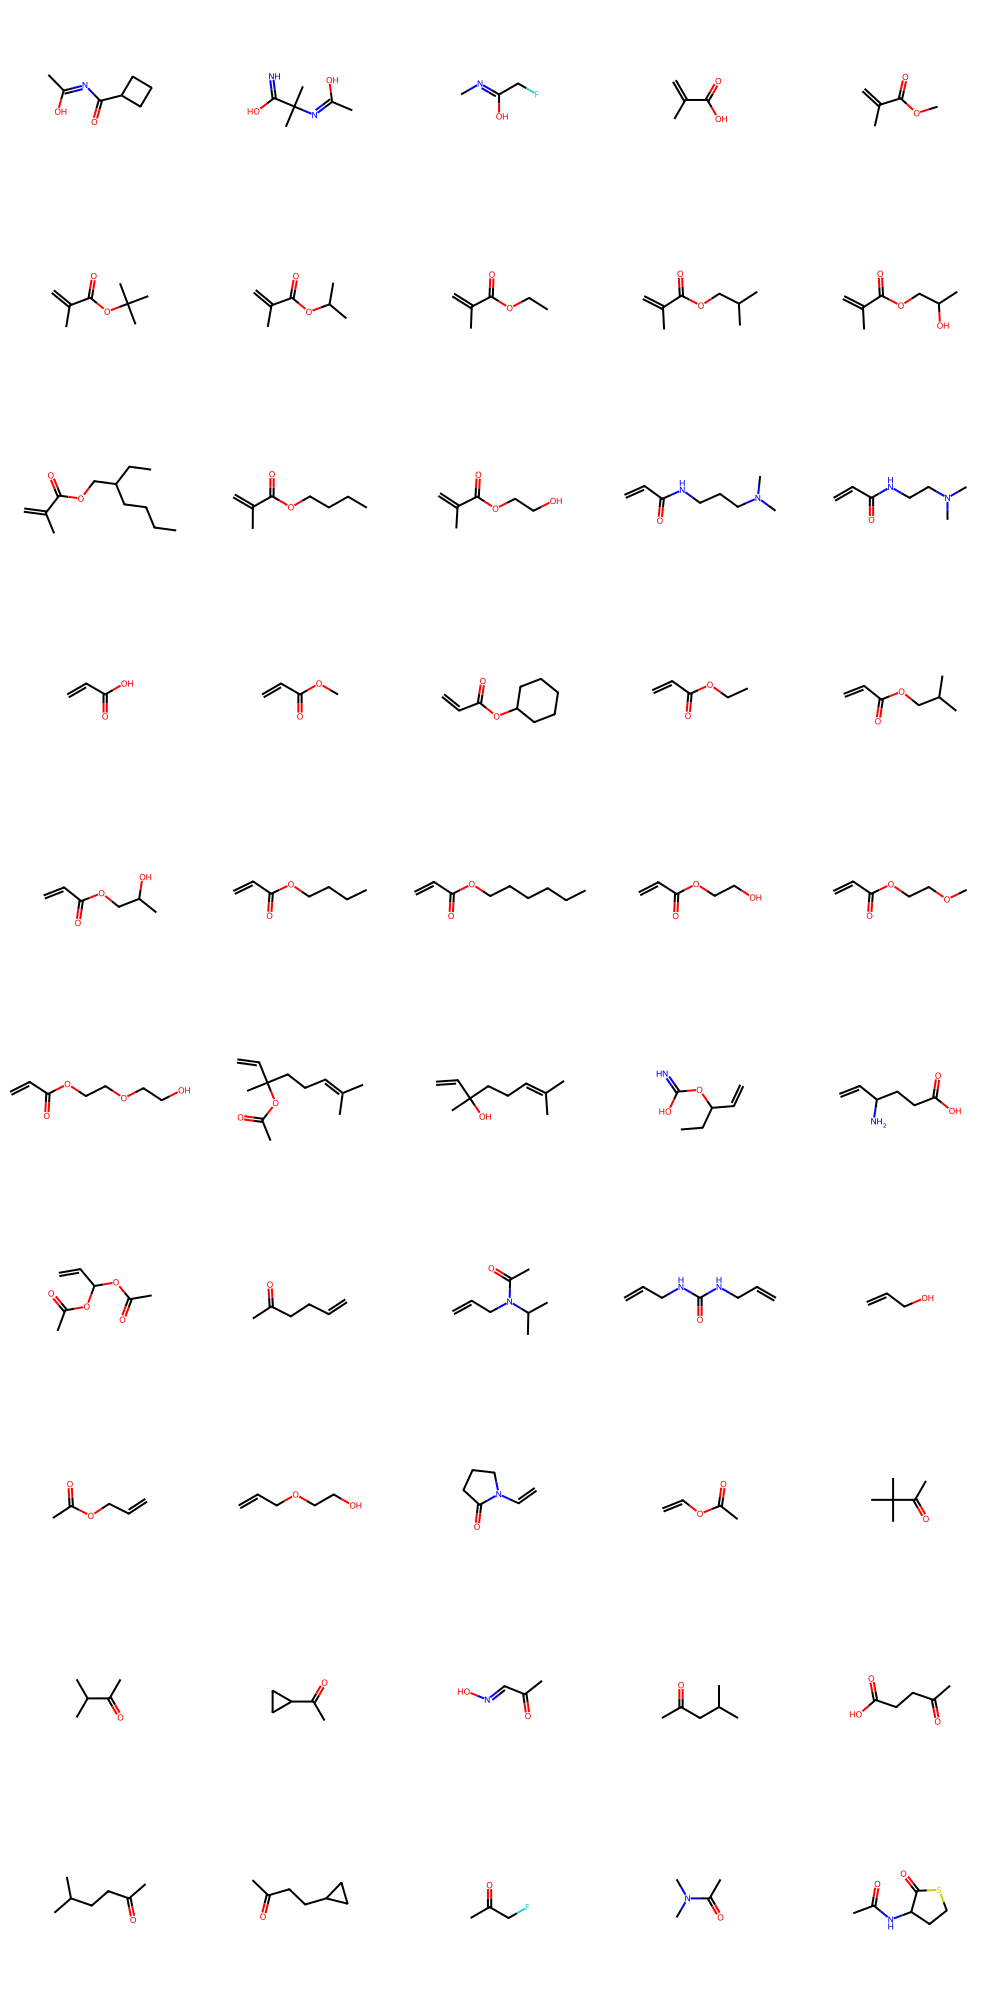

In [64]:
cluster_0 = [mols[i] for i in np.where(clusters == 0)[0]]
Draw.MolsToGridImage(cluster_0[:50],molsPerRow=5)

In [55]:
X_list = X.tolist()
centroids_list = centroids.tolist()

In [56]:
centroids_idxs = [X_list.index(c) for c in centroids_list]
centroids_idxs

ValueError: [-0.013649567814587043, -0.013649567814587043, -0.05913587716362985, 0.12197064870924922, -0.5903242362512551, -0.2858413074405818, -1.1597812054384313, -1.194385291491782, -1.1592579525920652, -1.0321347608912268, 0.0, 1.0034016715148386, 0.3820236583978963, -0.4045932264486034, -1.5406491841768912, 0.883213246360007, -1.3842233362749707, -1.0958967164114735, -0.9978818511915756, -1.0786024456154588, -1.1954909792482022, -0.9893673948567266, -1.0403462729903268, -0.9246699717223488, -0.9584099759736769, -0.9301671370582307, -0.9551543544374155, -0.8829207265563215, -0.8991752003817396, 1.1132052843175135, -0.00891380162959391, -0.852053281653191, -0.5119623891750147, 0.009006186155036256, -1.1876785199543207, -0.2714974935652086, -0.5471038998261224, -0.4759122114894594, -0.34279371908604855, -0.21202864530640342, 0.022404160452149036, -0.30964590925858937, -0.5105960814968762, -0.3181512788686632, -0.028765873559668382, -0.5853725104146319, -0.8219263297408025, -0.5213839937378674, -0.5030948303867312, -0.17559037393943855, -0.7225859985820632, -0.18758438862977359, -0.5601361375255943, -0.2573783465937087, 0.016614008981163896, -0.13716886666920552, -1.4454926220860476, 0.0, -0.5930944556272898, -0.6046505869058827, -0.5294444343279514, -0.506089357938474, -0.37285170436504383, -0.2833330140184317, -0.14769610384963597, -0.31769342054148364, -0.008502401788093906, -1.4073565668966328, -0.3013597423496966, -0.44192938095684065, 0.0, -0.45295477377272847, -0.305727160541158, -0.3509628203327716, -0.07485275909931251, -0.3342497432885869, -0.4492965150341452, -0.3306973771598673, -0.4489894259696541, -0.6166585212576823, -0.5334243080987241, -0.45872163636285274, -0.37602435900765774, -0.35276528940943375, -0.354079736947543, -0.270565117098842, -0.22627864517684496, -0.37627004555815247, -0.012954395320211873, -1.111990811817378, -0.010770620002908887, 0.179919714559832, 0.009521215567942201, 1.6053972881885525, -1.1739402646876893, -0.24086567103741593, -0.5500375123584021, -0.20061332923553876, -0.3493668624338948, -0.36259118617234154, -1.1489688509570155, -0.6310521934642084, -1.4371719971341177, -0.5880008650634188, -0.21463616110147962, -0.7373292777640891, -0.21138963046413398, -0.14807164571099857, -0.22599465489166196, -0.2437990040158085, -1.389561555760648, -0.8740409449190283, -1.2105949580407005, 0.3941918845732876, 0.03622742724158495, 0.05630222348762924, -0.23413479402856938, -0.1446105333515775, -0.541343632524134, -0.24574602921825112, -0.2610861694943711, 0.263469032545949, 0.2709102704415694, -0.005438259316632805, -0.09409058635402588, -0.06313148664047555, -0.08375374332167819, -0.23168903681060096, -0.6657018314770733, -0.2844987036193768, -0.19916870757218733, -0.015445856136312835, -0.03197682747551373, -0.060187389631508485, -0.24574602921825112, -0.07029693984493933, -0.08794224110015433, -0.035226748666817756, -0.14173988394450193, -0.10801712942507329, -0.1620273287243217, -0.21265234011697856, -0.4600242323196819, -0.4105327804073852, -0.0361294641600054, -0.1332677289797327, -0.06349320616523604, -1.1487597232581794, -0.07352941176470587, -0.42090332172519324, -0.01197583320079871, -0.032812467956589875, -0.052411895405715885, 0.0848368632340337, -0.2671197179764299, -0.15059904943818564, -0.1120748032353096, -0.37195440608500147, -0.11546147152083971, -0.0646217191992543, -0.26048600060688104, -0.14463101409390505, 0.0, -0.057575068484338306, -0.04686417014315623, 0.02295176898175739, -0.07450872504711832, 0.03733735873109505, -0.18946568589200047, -0.11959008923253382, -0.1851685910163374, -0.19540490611193803, -0.21540096013658702, -0.17901267306137583, -0.11117644994479012, -0.043216685659619336, -0.06961092235526073, -0.36161316831085566, -0.22984942938655376, -0.22570518906220277, -0.06573117677262132, -0.06573117677262132, -0.10523575350739062, -0.11939423775213148, -0.16031165117753, 0.0, -0.271883648410766, -0.047954943519693635, -0.14136772772240344, -0.2122512038713395, -0.0804304156667121, -0.08100408552385531, -0.07643053709936977, -0.10975231199234113, -0.02395682080782645, -0.12246449551107798, 0.1108052754312028, -0.08923905133628059, -0.008467889254687807, -0.02886751361325307] is not in list

In [43]:
kmeans = KMeans(n_clusters=3100, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Display the DataFrame with cluster labels
print(df)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['descriptor1'], df['descriptor2'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering')
plt.xlabel('Descriptor 1')
plt.ylabel('Descriptor 2')
plt.colorbar(label='Cluster')
plt.show()

KeyboardInterrupt: 